$$ \bf{EE0404\ SIGNAL\ PROCESSING\ APPLICATIONS} $$
$$ \ $$
$$ $$
$$ \text{Lecture 3} $$

$$ \text{Discrete Fourier Transform, PART 2}
 $$

$$ \text{ By: Güray GÜRKAN, PhD} $$

$$ Aug\ 2016 $$

# Discrete Fourier Transform

- Real frequencies of DFT basis functions

- DFT of a finite length discrete time signal
    - plotting with frequency bins in x-axis
    - plotting with real frequencies in x-axis
    
- Parameters affecting frequency resolution in DFT


In [2]:
%pylab inline
from numpy.fft import *
from IPython import display

def pol2cart(r,theta):
    return r*cos(theta), r*sin(theta)

thetas = linspace(0,2*np.pi,100)
[xx, yy]= pol2cart(1,thetas)


Populating the interactive namespace from numpy and matplotlib


# DFT Calculation: Example 1

We have given a complex sinusoidal signal $$ x(n) = e^{j0.02\pi n} $$

- If $\bf{M=1000} $, what is the index ($k$) of Fourier basis function on which $ x(n) $ has a non-zero projection?
- What is the projection value?
- What is the corresponding real frequency of the index if $ \bf{f_s = 500} $ Hz?


# DFT Calculation: Example 2
$$ x(n) = e^{j0.02\pi n} $$

- Generate 1000 samples.
- Calculate DFT using fft() command (from *numpy.fft* module)
    - fft_of_x = fft(x)
- Is this a complex or real valued vector?
- What are the corresponding $k$ values?
- What is the non-zero vector index and value?
- Plot the norm of this vector versus $k$.

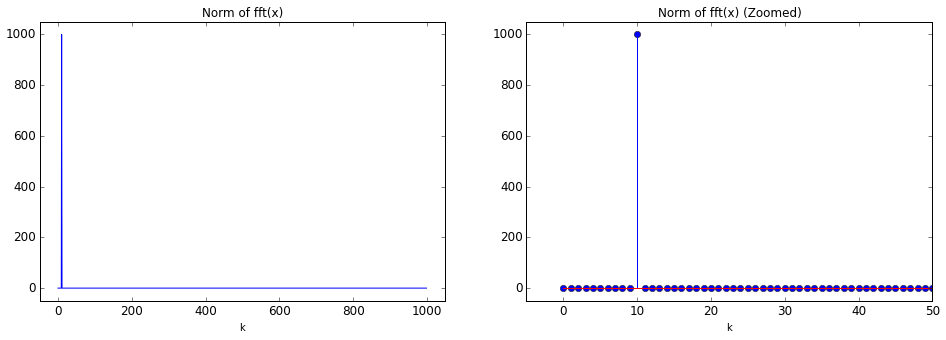

In [3]:
# Figure properties
rcParams['figure.figsize']=(16,5)
rcParams['xtick.labelsize']='large'
rcParams['ytick.labelsize']='large'

M = 1000
n = arange(M)
x = exp(1j*0.02*pi*n)
k = arange(1000) # for 1000 points of fft
fft_of_x = fft(x)

axes().set_aspect('equal')

subplot(1,2,1)
plot(k, abs(fft_of_x))
xlabel('k')
title('Norm of fft(x)')
ylim([-50, 1050]);
xlim([-50, 1050]);

subplot(1,2,2)
stem(k, abs(fft_of_x))
xlabel('k')
title('Norm of fft(x) (Zoomed)')
ylim([-50, 1050]);
xlim([-5, 50]);


# FFT bins ($k$) vs. $u_k(n)$ arguments
## _Recall:_
_Basis functions has the definition_

$$ u_k(n) = e^{j\Omega_k n},\ \ \ k=\{0,1,\dots, M-1\} $$

_where $\Omega_k$ is the argument of the complex $k^{th}$ basis function. The argument $\Omega_k$ is defined as_

$$\Omega_k = \frac{2\pi}{M} k,\ \ \ k=\{0,1,\dots,M-1\} $$

For the bins vector

$$ k = [0,1,\dots,\frac{M}{2}-1,\frac{M}{2},\frac{M}{2}+1,\dots, M-1] $$

the corresponding argument vector is

$$ \Omega = \frac{2\pi}{M}[0,1,\dots,\frac{M}{2}-1,\frac{M}{2},\frac{M}{2}+1,\dots, M-1] $$

$$ \Omega = [0,\frac{2\pi}{M},\dots,\pi-\frac{2\pi}{M},\pi,\pi+\frac{2\pi}{M},\dots, 2\pi-\frac{2\pi}{M}] $$



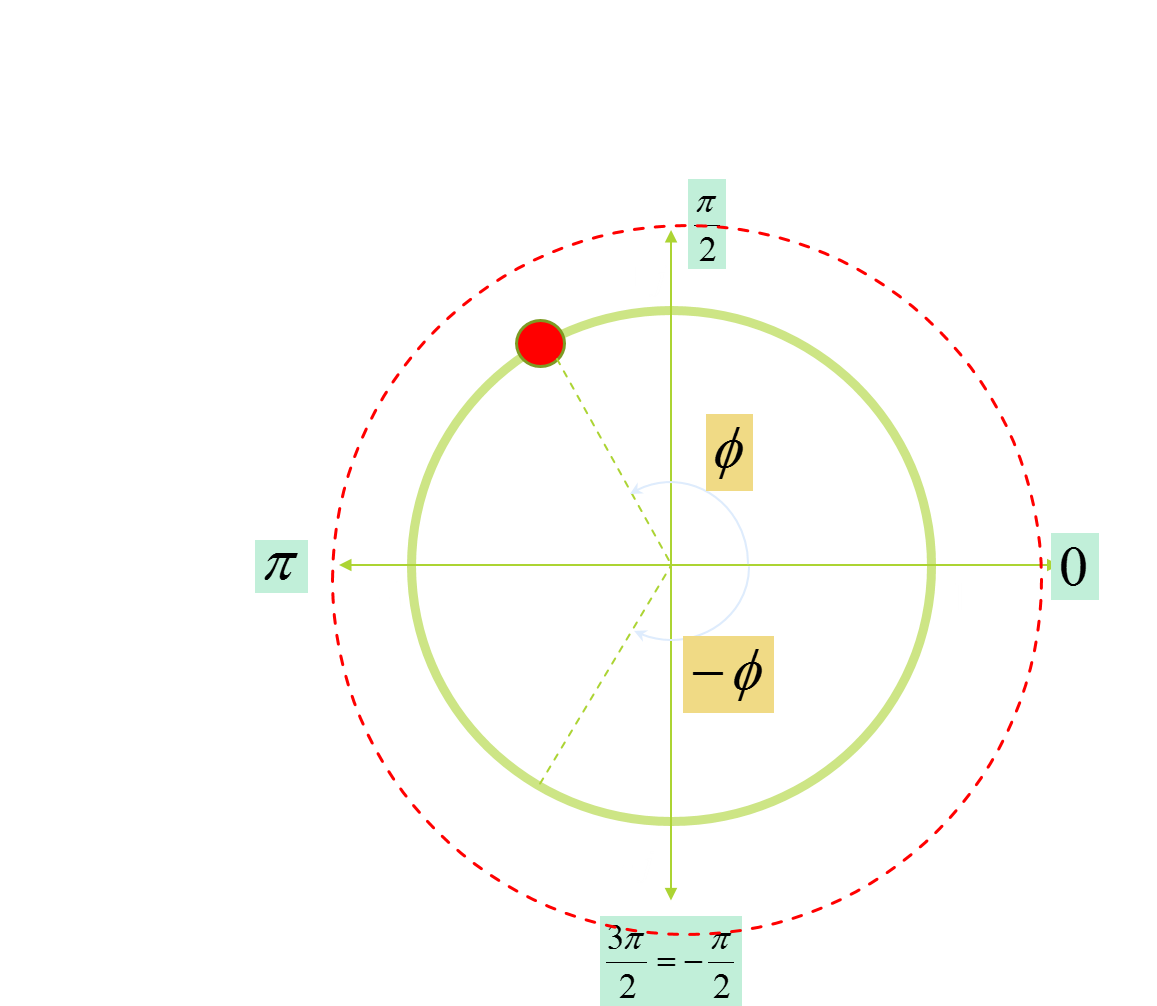

In [4]:
display.Image('./Figs/Lec3_fig1.png',width=500,height=500)

$$ \Omega = [0,\frac{2\pi}{M},\dots,\pi-\frac{2\pi}{M},\pi, -(\pi-\frac{2\pi}{M}),\dots, -\frac{2\pi}{M}] $$

$$ \hat{k} = [0,1,\dots,\frac{M}{2}-1,\frac{M}{2},-(\frac{M}{2}-1),\dots, -1]$$

Thus, via $M$ points of DFT calculation, we require M basis functions of which arguments are located around unit circle with intervals of $ \frac{2\pi}{M} $ and with highest argument $\pi$.

# Example 3
For M=10 points of DFT calculation, the $k$ values are
$$ k =[0,1,2,3,4,5,6,7,8,9] $$

and the arguments

$$ \Omega = [0,\frac {2\pi}{10},\frac {4\pi}{10},\frac {6\pi}{10},\frac {8\pi}{10},\frac {10\pi}{10},\frac {12\pi}{10},\frac {14\pi}{10},\frac {16\pi}{10},\frac {18\pi}{10}] $$

$$ \Omega = [0,\frac {2\pi}{10},\frac {4\pi}{10},\frac {6\pi}{10},\frac {8\pi}{10},\pi,-\frac {8\pi}{10},-\frac{6\pi}{10},-\frac {4\pi}{10},-\frac {2\pi}{10}] $$

Thus, frequency bins can also be written in the form:

$$ \hat{k} =[0,1,2,3,4,5,-4,-3,-2,-1] $$

$ \hat{k} $ can be generated by the command:

In [5]:
M = 10 
k = hstack((arange(M/2+1),arange(-M/2+1,0)))
print "k = ", k

k =  [ 0  1  2  3  4  5 -4 -3 -2 -1]


Thus, the basis functions are

$$ u_k(n) = [ 1,e^{j\frac {2\pi}{10}n},e^{j \frac{4\pi}{10}n},e^{j\frac {6\pi}{10}n},e^{j\frac {8\pi}{10}n},e^{j\pi n},e^{-j\frac {8\pi}{10}n},e^{-j\frac{6\pi}{10}n},e^{-j\frac {4\pi}{10}n},e^{-j\frac {2\pi}{10}n}] $$

# Example  2 revisited:

- The DFT plot can also be plotted respect to latter defined form of frequency bins as follows:

(-50, 50)

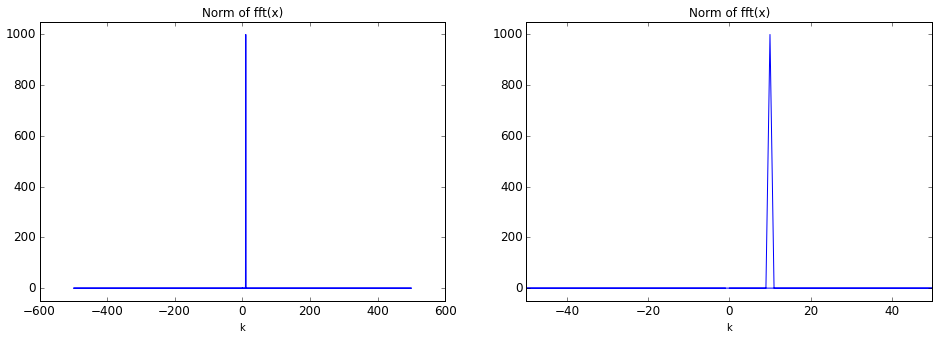

In [6]:
M = 1000;
khat = hstack((arange(M/2+1),arange(-M/2+1,0)))
subplot(1,2,1)
plot(khat, abs(fft_of_x))
xlabel('k')
title('Norm of fft(x)')
ylim([-50, 1050]);

subplot(1,2,2)
plot(khat, abs(fft_of_x))
xlabel('k')
title('Norm of fft(x)')
ylim([-50, 1050]);
xlim([-50,50])

# FFT bins ($k$) vs. real frequencies



## Recall:
*The sampled form of a sinusoidal function with (real world) frequency $f_r$ is given by*

$$ x(n)  = sin(2\pi f_r \frac{n}{f_s})= sin(\Omega n) $$ 

*Thus, the normalized angular frequency $\Omega$ of a discrete time sinusoidal signal is*

$$ \Omega = 2\pi \frac{f_r}{f_s} $$

*Recall that the $ k^{th}$ basis function of an M point DFT calculation has the normalized angular frequency*

$$ \Omega_k = \frac{2\pi}{M} k $$

*Thus the real frequency of the $ k^{th}$ basis function of an M point DFT calculation can be found by:*

$$ \Omega = 2\pi \frac{f_r}{f_s} = \frac{2\pi}{M} k $$

$$ \frac{f_r^{(k)}}{f_s} = \frac{k}{M} $$

$$ f_r^{(k)} = k \frac{f_s}{M} $$



# Example 4

Determine the real frequencies of a DFT calculation if 1000 samples are observed and $ f_s$ = 200 Hz

** Solution:**

We have $M$=1000 and $f_s$ =200 Hz. So:

$$ f_r = [0, \frac{200}{1000}, 2\frac{200}{1000},\dots,499\frac{200}{1000},500\frac{200}{1000},-499\frac{200}{1000},\dots,- \frac{200}{1000}] \ Hz  $$ 

$$ f_r = [0, 0.2, 0.4,\dots,99.8,100,-99.8,\dots,-0.2] \ Hz $$

# Example 5

$$ x(n) = e^{j0.02\pi n} $$
- Generate 1000 samples.
- Calculate DFT using fft() command,
    - fft_of_x = fft(x)
- Plot the norm of this vector versus real frequencies if $f_s$=200 Hz.

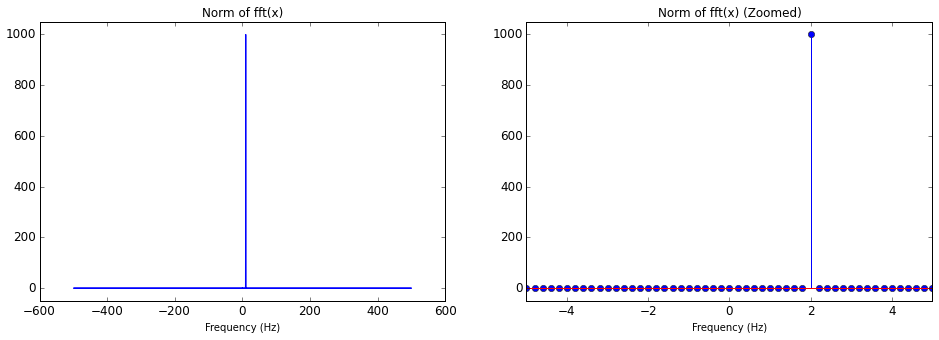

In [7]:
rcParams['figure.figsize']=(16,5)
rcParams['xtick.labelsize']='large'
rcParams['ytick.labelsize']='large'

M = 1000
fs = 200.0
n = arange(M)
x = exp(1j*0.02*pi*n)
k = hstack((arange(M/2+1),arange(-M/2+1,0)))
fft_of_x = fft(x)
axes().set_aspect('equal')
subplot(1,2,1)
fr = k*fs/M
plot(k, abs(fft_of_x))
xlabel('Frequency (Hz)')
title('Norm of fft(x)')
ylim([-50, 1050]);

subplot(1,2,2)
stem(k*fs/M, abs(fft_of_x))
xlabel('Frequency (Hz)')
title('Norm of fft(x) (Zoomed)')
ylim([-50, 1050]);
xlim([-5, 5]);

# Example 6
We are given a signal 

$$ x(n) = sin(0.4\pi n )$$

- What is the Euler form of this signal?
- What are the non-zero bins of  DFT for $M$=500?

- Generate the basis functions for these bins and calculate (complex) projections.
- Verify the result using fft() command output.


## Solution

- Euler form can be written as

$$ x(n) = \frac{e^{(j0.4\pi n)}-e^{(-j0.4\pi n)}}{2j}  $$

- For M=500, we have to find $k$ values such that the arguments are equal to $ \pm 0.4\pi $

$$ \Omega _k =\pm 0.4\pi= \frac {2\pi}{M} k = \frac {2\pi}{500} k  $$
    
$$ k = \pm 100 $$
    
- The basis functions are $u_{\pm 100}(n) $. Projection on $ u_{100}(n)$ can be calculated by:

    $$pr_1 = \sum\limits_{n=0}^{M-1}x(n) u_{100}(n)^* $$
    
    $$pr_2 = \sum\limits_{n=0}^{M-1}x(n) u_{-100}(n)^* $$

In [8]:
M=500
n=arange(M)
x= sin(0.4*pi*n)

pr1 = sum(x*exp(1j*0.4*pi*n))
print 'Projection 1: ',pr1
print 'Magnitude of Projection 1: ', abs(pr1)
print 'Argument of Projection 1: ', angle(pr1)*180/pi, 'degrees'

pr2 = sum(x*exp(-1j*0.4*pi*n))
print ' '
print 'Projection 2: ',pr2
print 'Magnitude of Projection 2: ', abs(pr2)
print 'Argument of Projection 2: ', angle(pr2)*180/pi, 'degrees'

Projection 1:  (-1.79412040779e-13+250j)
Magnitude of Projection 1:  250.0
Argument of Projection 1:  90.0 degrees
 
Projection 2:  (-1.79412040779e-13-250j)
Magnitude of Projection 2:  250.0
Argument of Projection 2:  -90.0 degrees


- To verify the result, we plot the magnitude of fft() output.

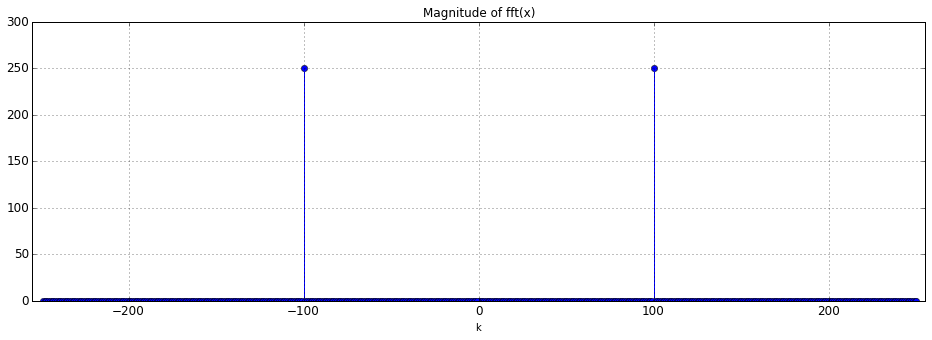

In [9]:
fft_of_x = fft(x)
k = hstack((arange(M/2+1),arange(-M/2+1,0)))
stem(k,abs(fft_of_x))
grid()
xlabel('k');
xlim([-255, 255]);
title('Magnitude of fft(x)');

# Example 7

We have given a signal 
$$ x(n) = sin(0.25\pi n ) + cos(0.1\pi n ) + 0.5 $$
- What are the real frequencies of the components of the signal if $f_s$ = 2000 Hz?
- What are the non-zero bins of  DFT for M=1000?
- Proof items 1 and 2 via fft() command. 

## Solution

- The first (sin.) component has $ \Omega_1 = 0.25 \pi $ wheras the second (cos.) component has  $ \Omega_2 = 0.1 \pi $ and third has $\Omega_3 = 0 $. Thus

$$ \Omega_1 = 2\pi \frac {(f_r)_1}{f_s} \rightarrow (f_r)_1 = f_s \frac {\Omega_1}{2\pi}  = 2000 \frac{0.25\pi}{2\pi}= 250\ Hz$$ 
$$ \Omega_2 = 2\pi \frac {(f_r)_2}{f_s} \rightarrow (f_r)_2 = f_s \frac {\Omega_2}{2\pi}  = 2000 \frac{0.1\pi}{2\pi}= 100\ Hz$$

- To find non-zero bins ($k$ values ), recall that $ u_k(n) = e^{j\frac{2\pi}{M}kn} $ has $\Omega_k = \frac{2\pi}{M}k $. So if 
$\Omega_k = \pm \Omega_1 $, $\Omega_k = \pm  \Omega_2 $ and $\Omega_k = 0 $,  we have non-zero projections. Thus

$$ \frac{2\pi}{1000}k_{11} = 0.25 \pi \rightarrow k_{11} = 125 $$
$$ \frac{2\pi}{1000}k_{12} = (2 - 0.25) \pi \rightarrow k_{12} = 875 =  -125 $$

$$ \frac{2\pi}{1000}k_{21} = 0.1 \pi \rightarrow k_{21} = 50 $$
$$ \frac{2\pi}{1000}k_{22} = (2 - 0.1) \pi \rightarrow k_{22} = 950 = -50 $$
$$ k_3 = 0 $$

Thus, non-zero bins are 0, $\pm$ 50 and $\pm$ 125.

- To verify via fft command:

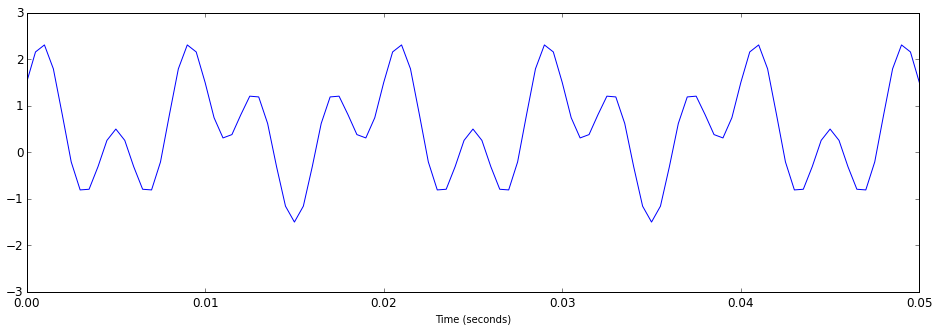

In [10]:
M=1000
n=arange(M)
fs = 2000.0 
x= sin(0.25*pi*n) + cos(0.1*pi*n) + .5
t= n/fs
plot(t,x)
xlim([0,0.05])
ylim([-3,3])
xlabel('Time (seconds)')

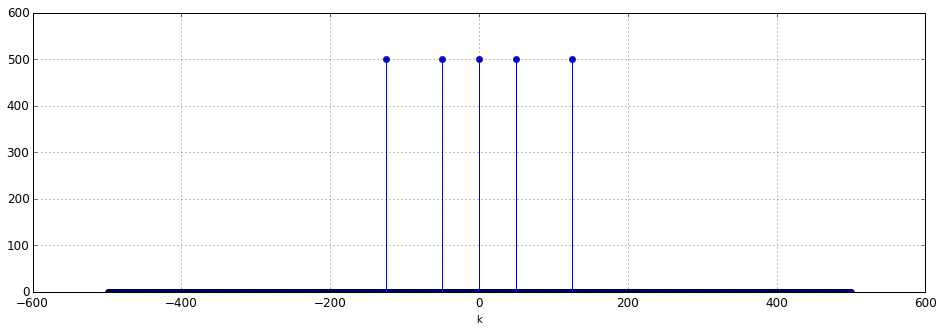

In [11]:
fft_of_x = fft(x)
k = hstack((arange(M/2+1),arange(-M/2+1,0)))
stem(k,abs(fft_of_x))
grid()
xlabel('k');

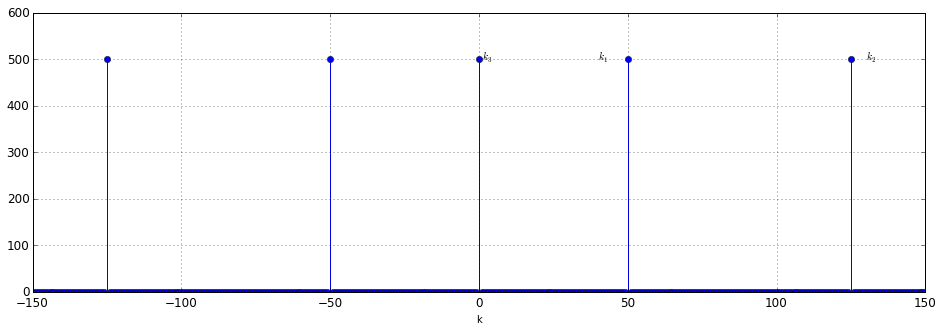

In [12]:
stem(k,abs(fft_of_x))
grid()
xlabel('k');
xlim([-150, 150])
hold()
text(130,500,'$k_2$')
text(40,500,'$k_1$')
text(1,500,'$k_3$')

(-300, 300)

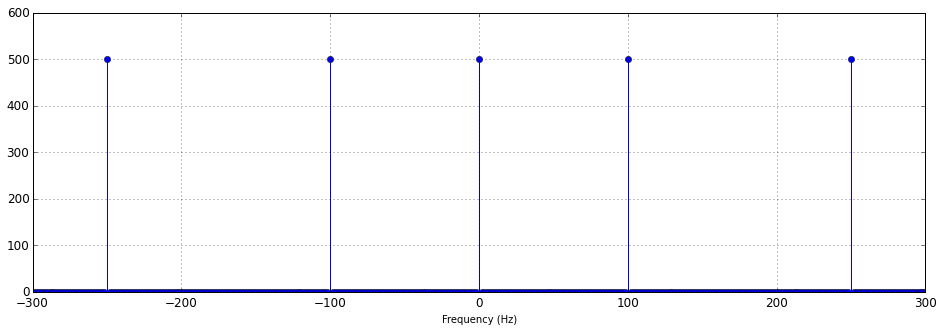

In [13]:
fr = k*fs/M
stem(fr,abs(fft_of_x))
grid()
xlabel('Frequency (Hz)');
xlim([-300, 300])

# Resolution

Since $k$ can have only integer values, the real frequencies are seperated by

$$ \Delta f_r^{(k)} = \Delta k \frac{f_s}{M} = \frac{f_s}{M} $$

The final equation tells us that, if a high resolution is required for analysis, the number of samples (observed) should be increased. 

## Example

- A continuous time signal $x(t)$ 
    $$ x(t) = sin(20\pi t) + sin(21\pi t) $$
    will be sampled at $f_s$= 1 kHz.
    - What are the real frequency of sin. components?
    - What is the minimum number of samples required if DFT operation is desired to reveal these frequencies as successive peaks?
    

** Solution **

- Writing $x(t)$ as 
$$ x(t) = sin(2\pi 10 t) + sin(2\pi 10.5 t) $$ 

the real frequencies of the components can be seen to be 10 and 10.5 Hz, respectively. Thus, the DFT operation is required to distinguish frequency intervals of at least 0.5 Hz. By applying the formula:

$$ \Delta f_r^{(k)} = \frac{f_s}{M} $$

$$ 0.5 = \frac{1000}{M} \rightarrow M=2000$$

Thus, 2000 samples are required for adjugate resolution.

(0, 1)

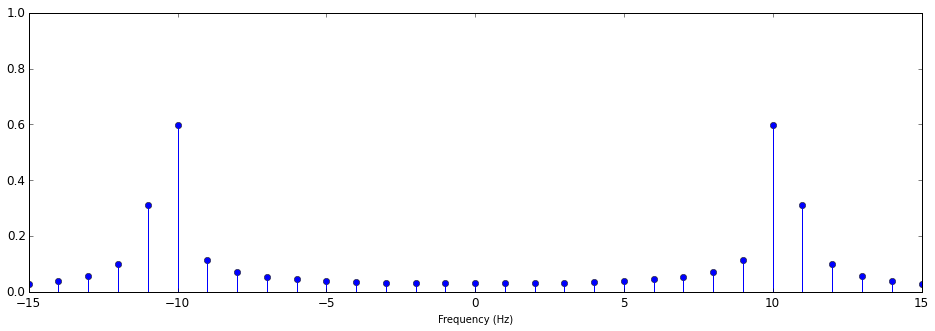

In [14]:
## Proof

fs = 1000.0
# case 1: poor resolution
M1 = 1000
n = arange(M1)
x = sin(20*pi*n/fs) + sin(21*pi*n/fs) 
k = hstack((arange(M1/2+1),arange(-M1/2 +1,0)))
fr = k*fs/M1
stem(fr,abs(fft(x))/M1)
xlim([-15,15])
xlabel('Frequency (Hz)')
ylim([0,1])

(0, 1)

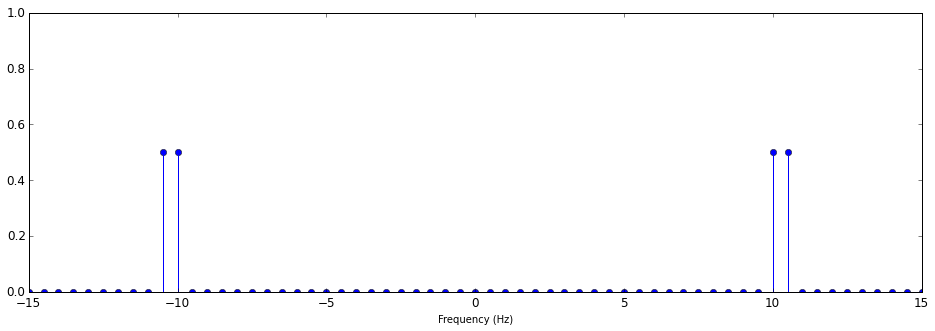

In [15]:
# case 2: adj. resolution
M1 = 2000
n = arange(M1)
x = sin(20*pi*n/fs) + sin(21*pi*n/fs) 
k = hstack((arange(M1/2+1),arange(-M1/2 +1,0)))
fr = k*fs/M1
stem(fr,abs(fft(x))/M1)
xlim([-15,15])
xlabel('Frequency (Hz)')
ylim([0,1])